In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

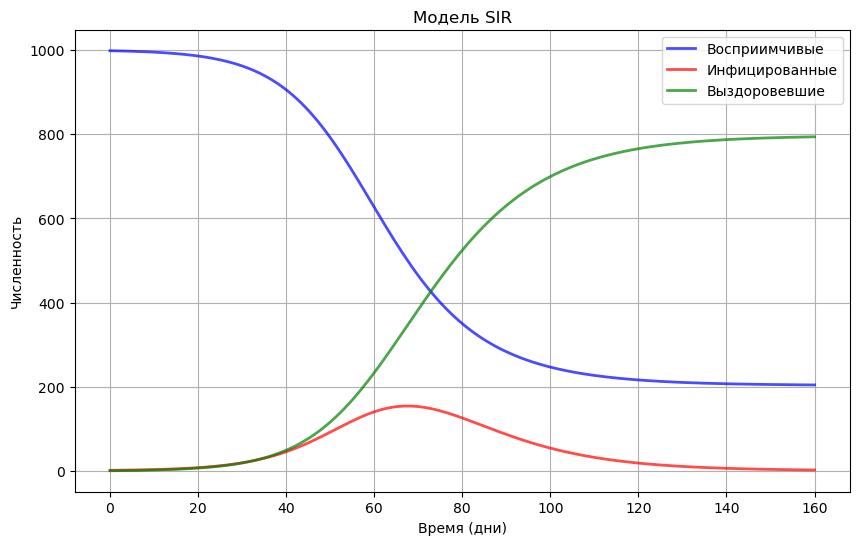

In [2]:
#SIR
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

#параметры модели
N = 1000  #общее население
I0 = 1    #количество инфицированных в начальный момент времени
R0 = 0    #количество выздоровевших в начальный момент времени
S0 = N - I0 - R0  #количество восприимчивых в начальный момент времени
beta = 0.2        #коэффициент инфекции
gamma = 0.1       #коэффициент выздоровления
t = np.linspace(0, 160, 160)  #временные шаги (дни)

#решение дифференциального уравнения
y0 = S0, I0, R0
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

#визуализация
plt.figure(figsize=(10, 6))
plt.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Восприимчивые')
plt.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Инфицированные')
plt.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Выздоровевшие')
plt.xlabel('Время (дни)')
plt.ylabel('Численность')
plt.title('Модель SIR')
plt.legend()
plt.grid(True)
plt.show()

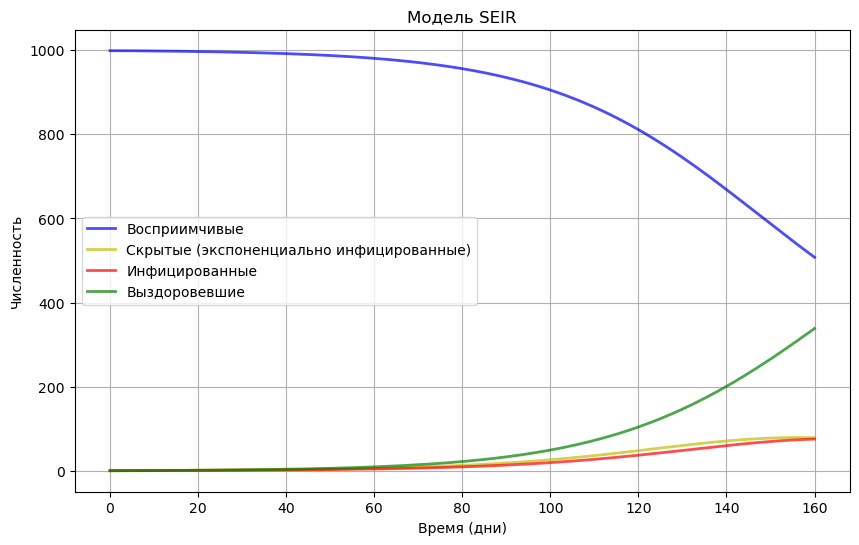

In [3]:
#SEIR
def deriv(y, t, N, beta, sigma, gamma):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

#параметры модели
N = 1000   #общее население
E0 = 1     #количество скрытых (экспоненциально инфицированных) в начальный момент времени
I0 = 0     #количество инфицированных в начальный момент времени
R0 = 0     #количество выздоровевших в начальный момент времени
S0 = N - E0 - I0 - R0  #количество восприимчивых в начальный момент времени
beta = 0.2   #коэффициент инфекции
gamma = 0.1  #коэффициент выздоровления
sigma = 0.1  #коэффициент перехода из скрытого состояния в инфицированный
t = np.linspace(0, 160, 160)  #временные шаги (дни)

#решение дифференциального уравнения
y0 = S0, E0, I0, R0
ret = odeint(deriv, y0, t, args=(N, beta, sigma, gamma))
S, E, I, R = ret.T

#визуализация
plt.figure(figsize=(10, 6))
plt.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Восприимчивые')
plt.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Скрытые (экспоненциально инфицированные)')
plt.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Инфицированные')
plt.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Выздоровевшие')
plt.xlabel('Время (дни)')
plt.ylabel('Численность')
plt.title('Модель SEIR')
plt.legend()
plt.grid(True)
plt.show()

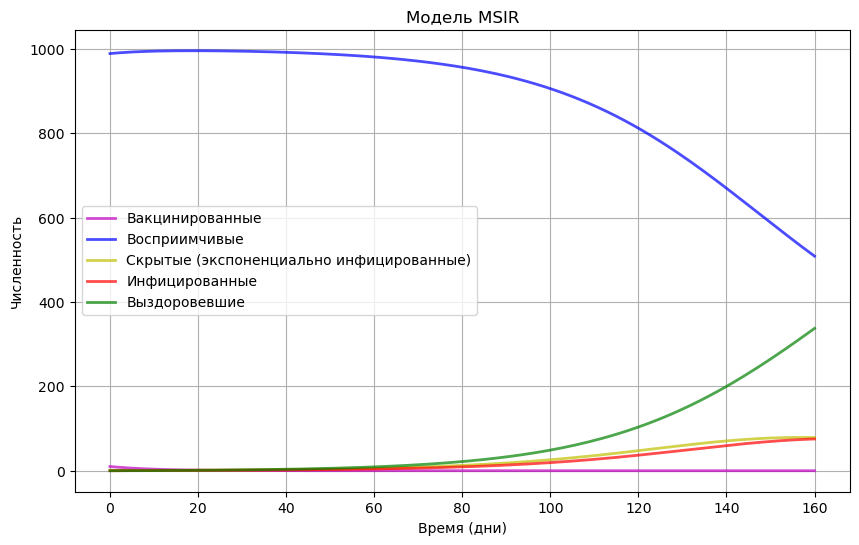

In [4]:
#MSEIR
def deriv(y, t, N, beta, sigma, gamma_M, gamma):
    M, S, E, I, R = y
    dMdt = -gamma_M * M
    dSdt = gamma_M * M - beta * S * I / N
    dEdt = beta * S * I / N - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I
    return dMdt, dSdt, dEdt, dIdt, dRdt

#параметры модели
N = 1000    # общее население
M0 = 10     # количество вакцинированных в начальный момент времени
E0 = 1      # количество инфицированных в начальный момент времени
I0 = 0      # количество инфицированных в начальный момент времени
R0 = 0      # количество выздоровевших в начальный момент времени
S0 = N - M0 - E0 - I0 - R0  # количество восприимчивых в начальный момент времени
beta = 0.2     # коэффициент инфекции
gamma_M = 0.1  # коэффициент вакцинации
gamma = 0.1    # коэффициент выздоровления
sigma = 0.1    # коэффициент перехода из скрытого состояния в инфицированный
t = np.linspace(0, 160, 160)  # временные шаги (дни)

#решение дифференциального уравнения
y0 = M0, S0, E0, I0, R0
ret = odeint(deriv, y0, t, args=(N, beta, sigma, gamma_M, gamma))
M, S, E, I, R = ret.T

#визуализация
plt.figure(figsize=(10, 6))
plt.plot(t, M, 'm', alpha=0.7, linewidth=2, label='Вакцинированные')
plt.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Восприимчивые')
plt.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Скрытые (экспоненциально инфицированные)')
plt.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Инфицированные')
plt.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Выздоровевшие')
plt.xlabel('Время (дни)')
plt.ylabel('Численность')
plt.title('Модель MSIR')
plt.legend()
plt.grid(True)
plt.show()

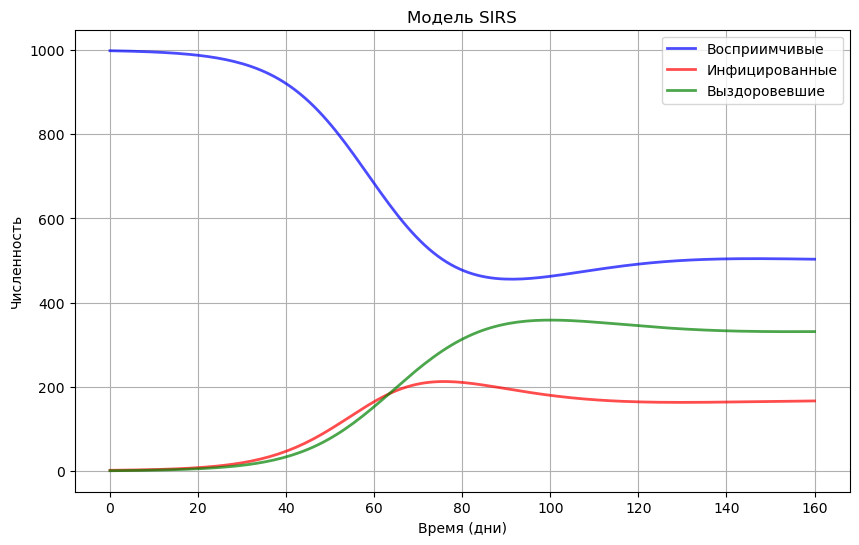

In [5]:
#SIRS
def deriv(y, t, N, beta, gamma, delta):
    S, I, R = y
    dSdt = -beta * S * I / N + delta * R
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I - delta * R
    return dSdt, dIdt, dRdt

#параметры модели
N = 1000    # общее население
I0 = 1      # количество инфицированных в начальный момент времени
R0 = 0      # количество выздоровевших в начальный момент времени
S0 = N - I0 - R0  # количество восприимчивых в начальный момент времени
beta = 0.2       # коэффициент инфекции
gamma = 0.1      # коэффициент выздоровления
delta = 0.05     # коэффициент рождения подверженных заболеванию
t = np.linspace(0, 160, 160)  # временные шаги (дни)

#решение дифференциального уравнения
y0 = S0, I0, R0
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta))
S, I, R = ret.T

#визуализация
plt.figure(figsize=(10, 6))
plt.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Восприимчивые')
plt.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Инфицированные')
plt.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Выздоровевшие')
plt.xlabel('Время (дни)')
plt.ylabel('Численность')
plt.title('Модель SIRS')
plt.legend()
plt.grid(True)
plt.show()